In [30]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [31]:
# fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51.bag is with v_ref = lead's vel (exact, not estimated)
bagfile = "fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51.bag"

In [32]:
bg = bagreader(bagfile = bagfile)

[INFO]  Data folder fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51 already exists. Not creating.


In [33]:
bg.topic_table

,Topics,Types,Message Count,Frequency
0,/catvehicle/cmd_vel,geometry_msgs/Twist,6331,20.000000
1,/catvehicle/distanceEstimatorSteeringBased/Xdist,std_msgs/Float64,8649,25.000000
2,/catvehicle/distanceEstimatorSteeringBased/Ydist,std_msgs/Float64,8647,25.000000
3,/catvehicle/distanceEstimatorSteeringBased/angle,std_msgs/Float64,8647,25.000000
4,/catvehicle/distanceEstimatorSteeringBased/dist,std_msgs/Float64,8647,25.000000
5,/catvehicle/front_laser_points,sensor_msgs/LaserScan,18595,NaN
6,/catvehicle/front_left_steering_position_contr...,std_msgs/Float64,31640,100.000000
7,/catvehicle/front_right_steering_position_cont...,std_msgs/Float64,31639,100.000000
8,/catvehicle/joint1_velocity_controller/command,std_msgs/Float64,31636,100.000000
9,/catvehicle/joint2_velocity_controller/command,std_msgs/Float64,31636,100.000000


In [34]:
vels = bg.vel_data()

In [35]:
vels

['fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-cmd_vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-toyota-cmd_vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-toyota-vel.csv']

In [36]:
ego_cmd_vel = pd.read_csv(vels[0])
ego_inst_vel = pd.read_csv(vels[1])
leader_cmd_vel = pd.read_csv(vels[2])
leader_inst_vel = pd.read_csv(vels[3])

In [37]:
stds = bg.std_data()

In [38]:
stds

['fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-distanceEstimatorSteeringBased-Xdist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-distanceEstimatorSteeringBased-Ydist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-distanceEstimatorSteeringBased-angle.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-distanceEstimatorSteeringBased-dist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-front_left_steering_position_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-front_right_steering_position_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-joint1_velocity_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-joint2_velocity_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51/-catvehicle-v_relative.csv',


In [39]:
ego_cmd_vel

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,25.21,0.001408,0.0,0.0,0.0,0.0,0.000014
1,25.26,0.001408,0.0,0.0,0.0,0.0,0.000014
2,25.31,0.001409,0.0,0.0,0.0,0.0,0.000014
3,25.36,0.001394,0.0,0.0,0.0,0.0,0.000001
4,25.41,0.001409,0.0,0.0,0.0,0.0,0.000014
...,...,...,...,...,...,...,...
6326,341.36,12.606705,0.0,0.0,0.0,0.0,-0.000248
6327,341.41,12.622437,0.0,0.0,0.0,0.0,-0.000569
6328,341.46,12.651912,0.0,0.0,0.0,0.0,-0.000162
6329,341.51,12.667299,0.0,0.0,0.0,0.0,-0.000904


In [40]:
relative_dist = pd.read_csv(stds[3])

In [41]:
relative_dist

,Time,data
0,25.33,10.496806
1,25.37,10.496751
2,25.39,10.496711
3,25.44,10.496655
4,25.48,10.496602
...,...,...
8642,341.43,75.221181
8643,341.48,75.221181
8644,341.50,75.221181
8645,341.52,75.221181


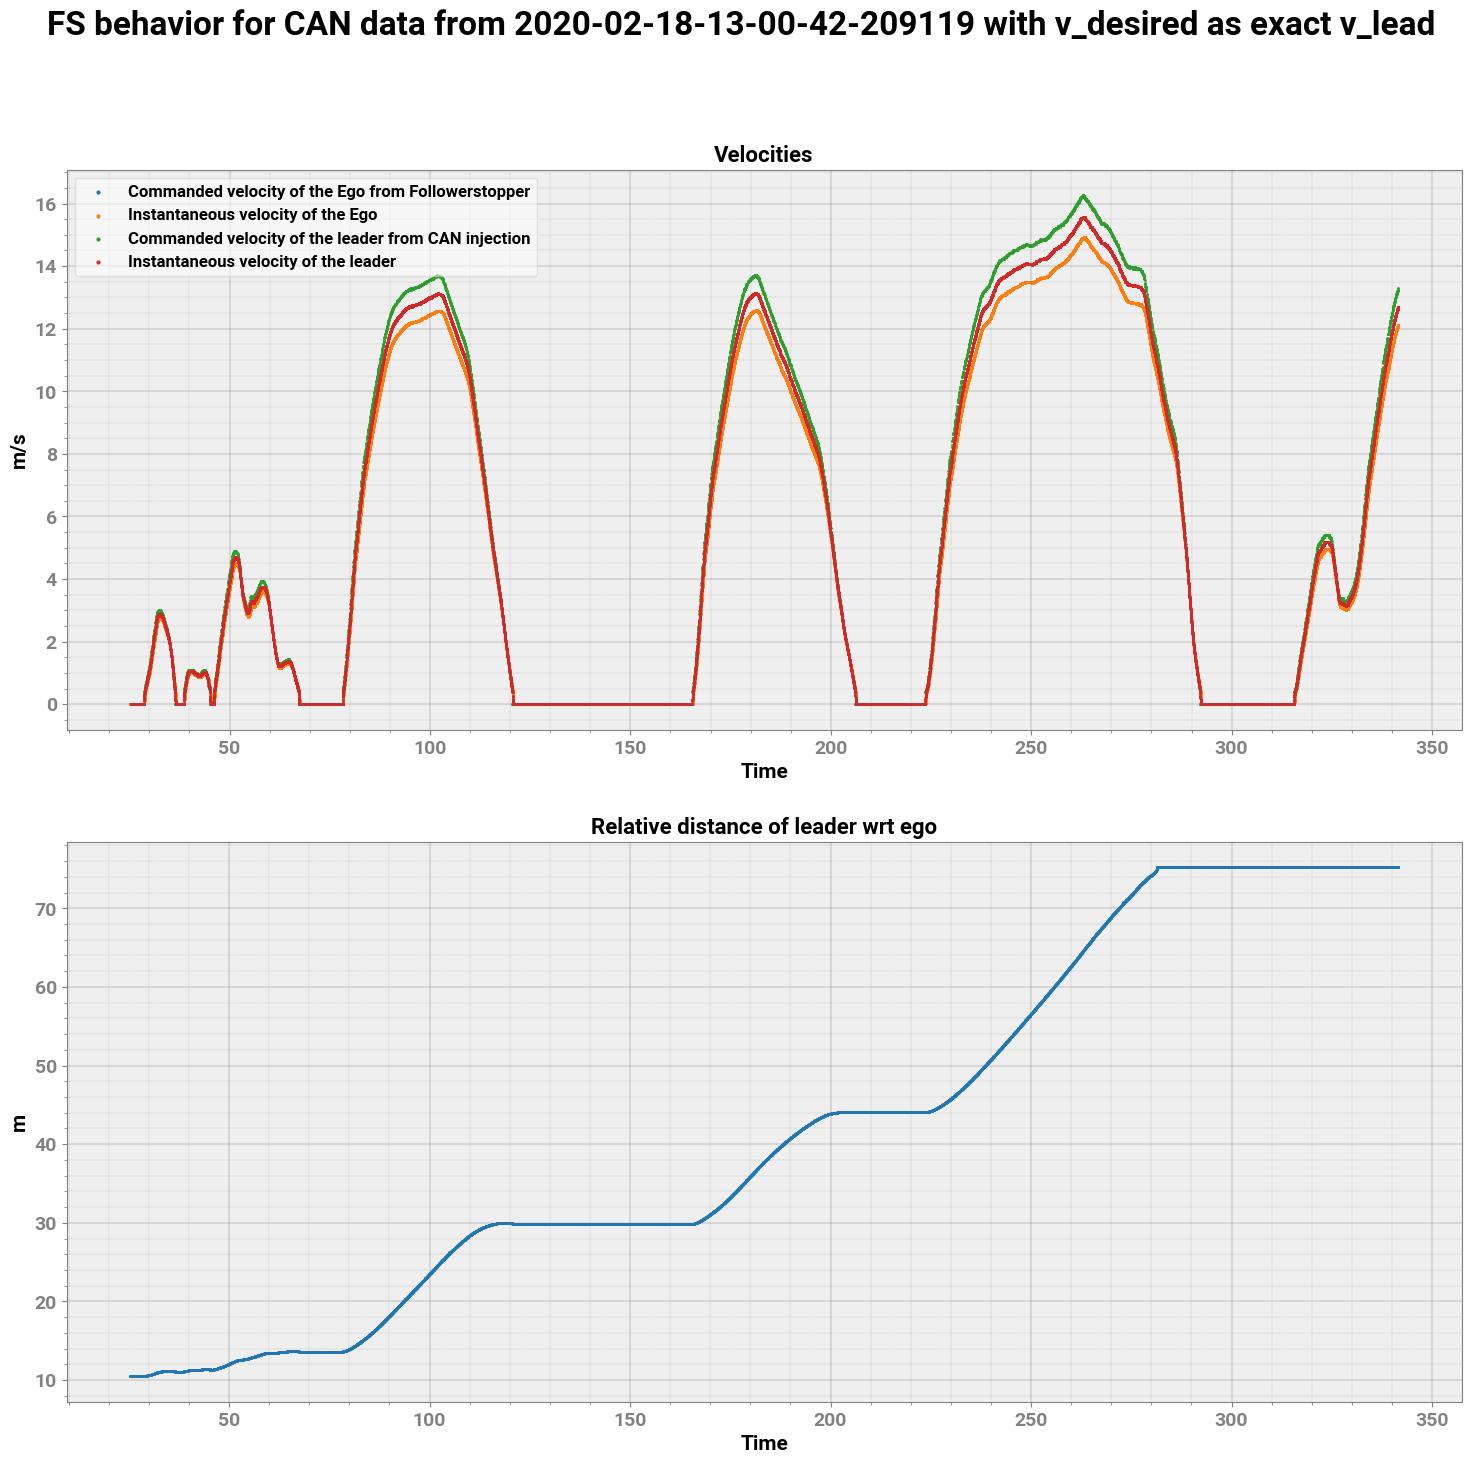

In [42]:
fig, ax = bagpy.create_fig(2)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = ego_cmd_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = ego_inst_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = leader_cmd_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = leader_inst_vel)
ax[0].legend(["Commanded velocity of the Ego from Followerstopper", "Instantaneous velocity of the Ego", 
             "Commanded velocity of the leader from CAN injection", "Instantaneous velocity of the leader"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("m/s")
ax[0].set_title("Velocities")

ax[1].scatter(x = "Time", y = "data", s= 1, data = relative_dist)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("m")
ax[1].set_title("Relative distance of leader wrt ego")
fig.suptitle("FS behavior for CAN data from 2020-02-18-13-00-42-209119 with v_desired as exact v_lead")
plt.show()



In [43]:
# fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-15-51-51.bag is with v_ref = lead's vel (estimated)
bagfile = "fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13.bag"
bg = bagreader(bagfile = bagfile)
vels = bg.vel_data()
vels

[INFO]  Data folder fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13 already exists. Not creating.


['fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-cmd_vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-toyota-cmd_vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-toyota-vel.csv']

In [44]:
ego_cmd_vel = pd.read_csv(vels[0])
ego_inst_vel = pd.read_csv(vels[1])
leader_cmd_vel = pd.read_csv(vels[2])
leader_inst_vel = pd.read_csv(vels[3])

In [45]:
stds = bg.std_data()
stds

['fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-distanceEstimatorSteeringBased-Xdist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-distanceEstimatorSteeringBased-Ydist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-distanceEstimatorSteeringBased-angle.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-distanceEstimatorSteeringBased-dist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-front_left_steering_position_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-front_right_steering_position_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-joint1_velocity_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-joint2_velocity_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-12-13/-catvehicle-v_relative.csv',


In [46]:
relative_dist = pd.read_csv(stds[3])
relative_vel = pd.read_csv(stds[8])

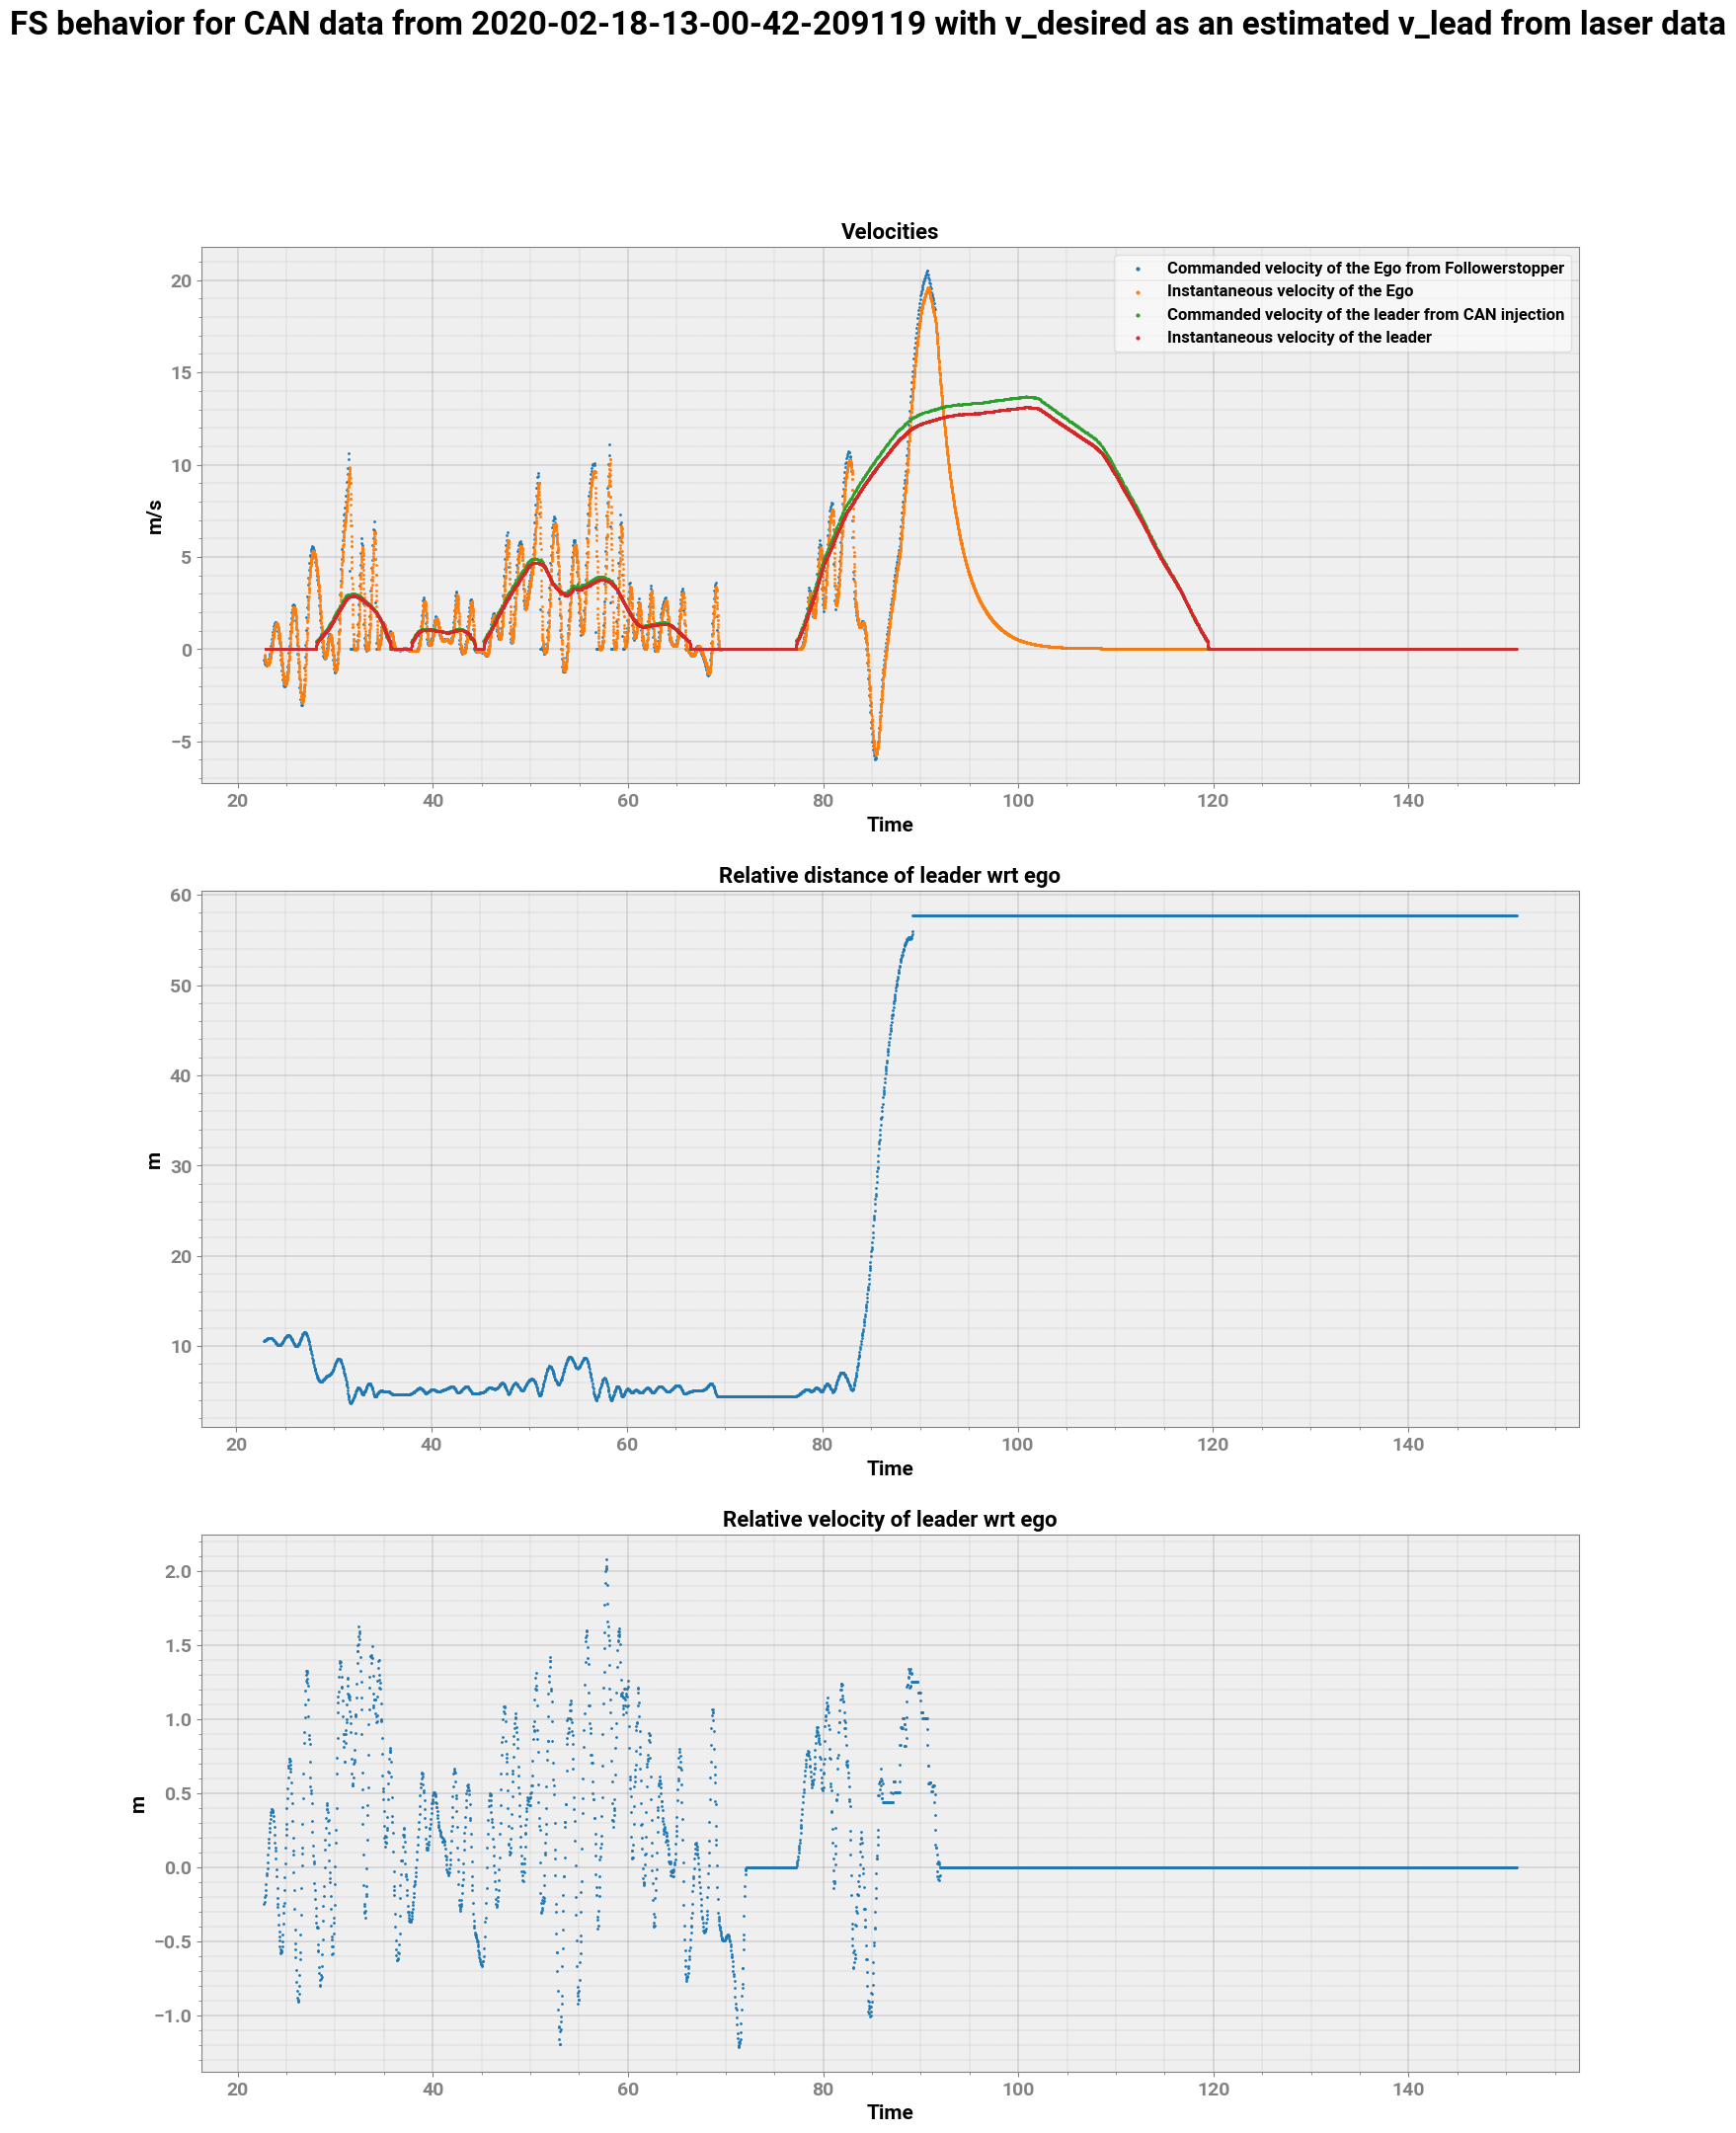

In [47]:
fig, ax = bagpy.create_fig(3)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = ego_cmd_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = ego_inst_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = leader_cmd_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = leader_inst_vel)
ax[0].legend(["Commanded velocity of the Ego from Followerstopper", "Instantaneous velocity of the Ego", 
             "Commanded velocity of the leader from CAN injection", "Instantaneous velocity of the leader"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("m/s")
ax[0].set_title("Velocities")

ax[1].scatter(x = "Time", y = "data", s= 1, data = relative_dist)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("m")
ax[1].set_title("Relative distance of leader wrt ego")

ax[2].scatter(x = "Time", y = "data", s= 1, data = relative_vel)
ax[2].set_xlabel("Time")
ax[2].set_ylabel("m")
ax[2].set_title("Relative velocity of leader wrt ego")
fig.suptitle("FS behavior for CAN data from 2020-02-18-13-00-42-209119 with v_desired as an estimated v_lead from laser data")

plt.show()



In [48]:
bagfile = "fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44.bag"
bg = bagreader(bagfile = bagfile)
vels = bg.vel_data()
vels

[INFO]  Successfully created the data folder fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44.


['fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-cmd_vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-toyota-cmd_vel.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-toyota-vel.csv']

In [49]:
ego_cmd_vel = pd.read_csv(vels[0])
ego_inst_vel = pd.read_csv(vels[1])
leader_cmd_vel = pd.read_csv(vels[2])
leader_inst_vel = pd.read_csv(vels[3])

In [50]:
stds = bg.std_data()
stds

['fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-distanceEstimatorSteeringBased-Xdist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-distanceEstimatorSteeringBased-Ydist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-distanceEstimatorSteeringBased-angle.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-distanceEstimatorSteeringBased-dist.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-front_left_steering_position_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-front_right_steering_position_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-joint1_velocity_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-joint2_velocity_controller-command.csv',
 'fs-test1_dxmin_4.5_dx_activate_6.0_2020-08-26-16-51-44/-catvehicle-kf-dist.csv',
 'f

In [51]:
relative_dist = pd.read_csv(stds[3])
relative_vel = pd.read_csv(stds[9])
Kf_relative_dist = pd.read_csv(stds[8])

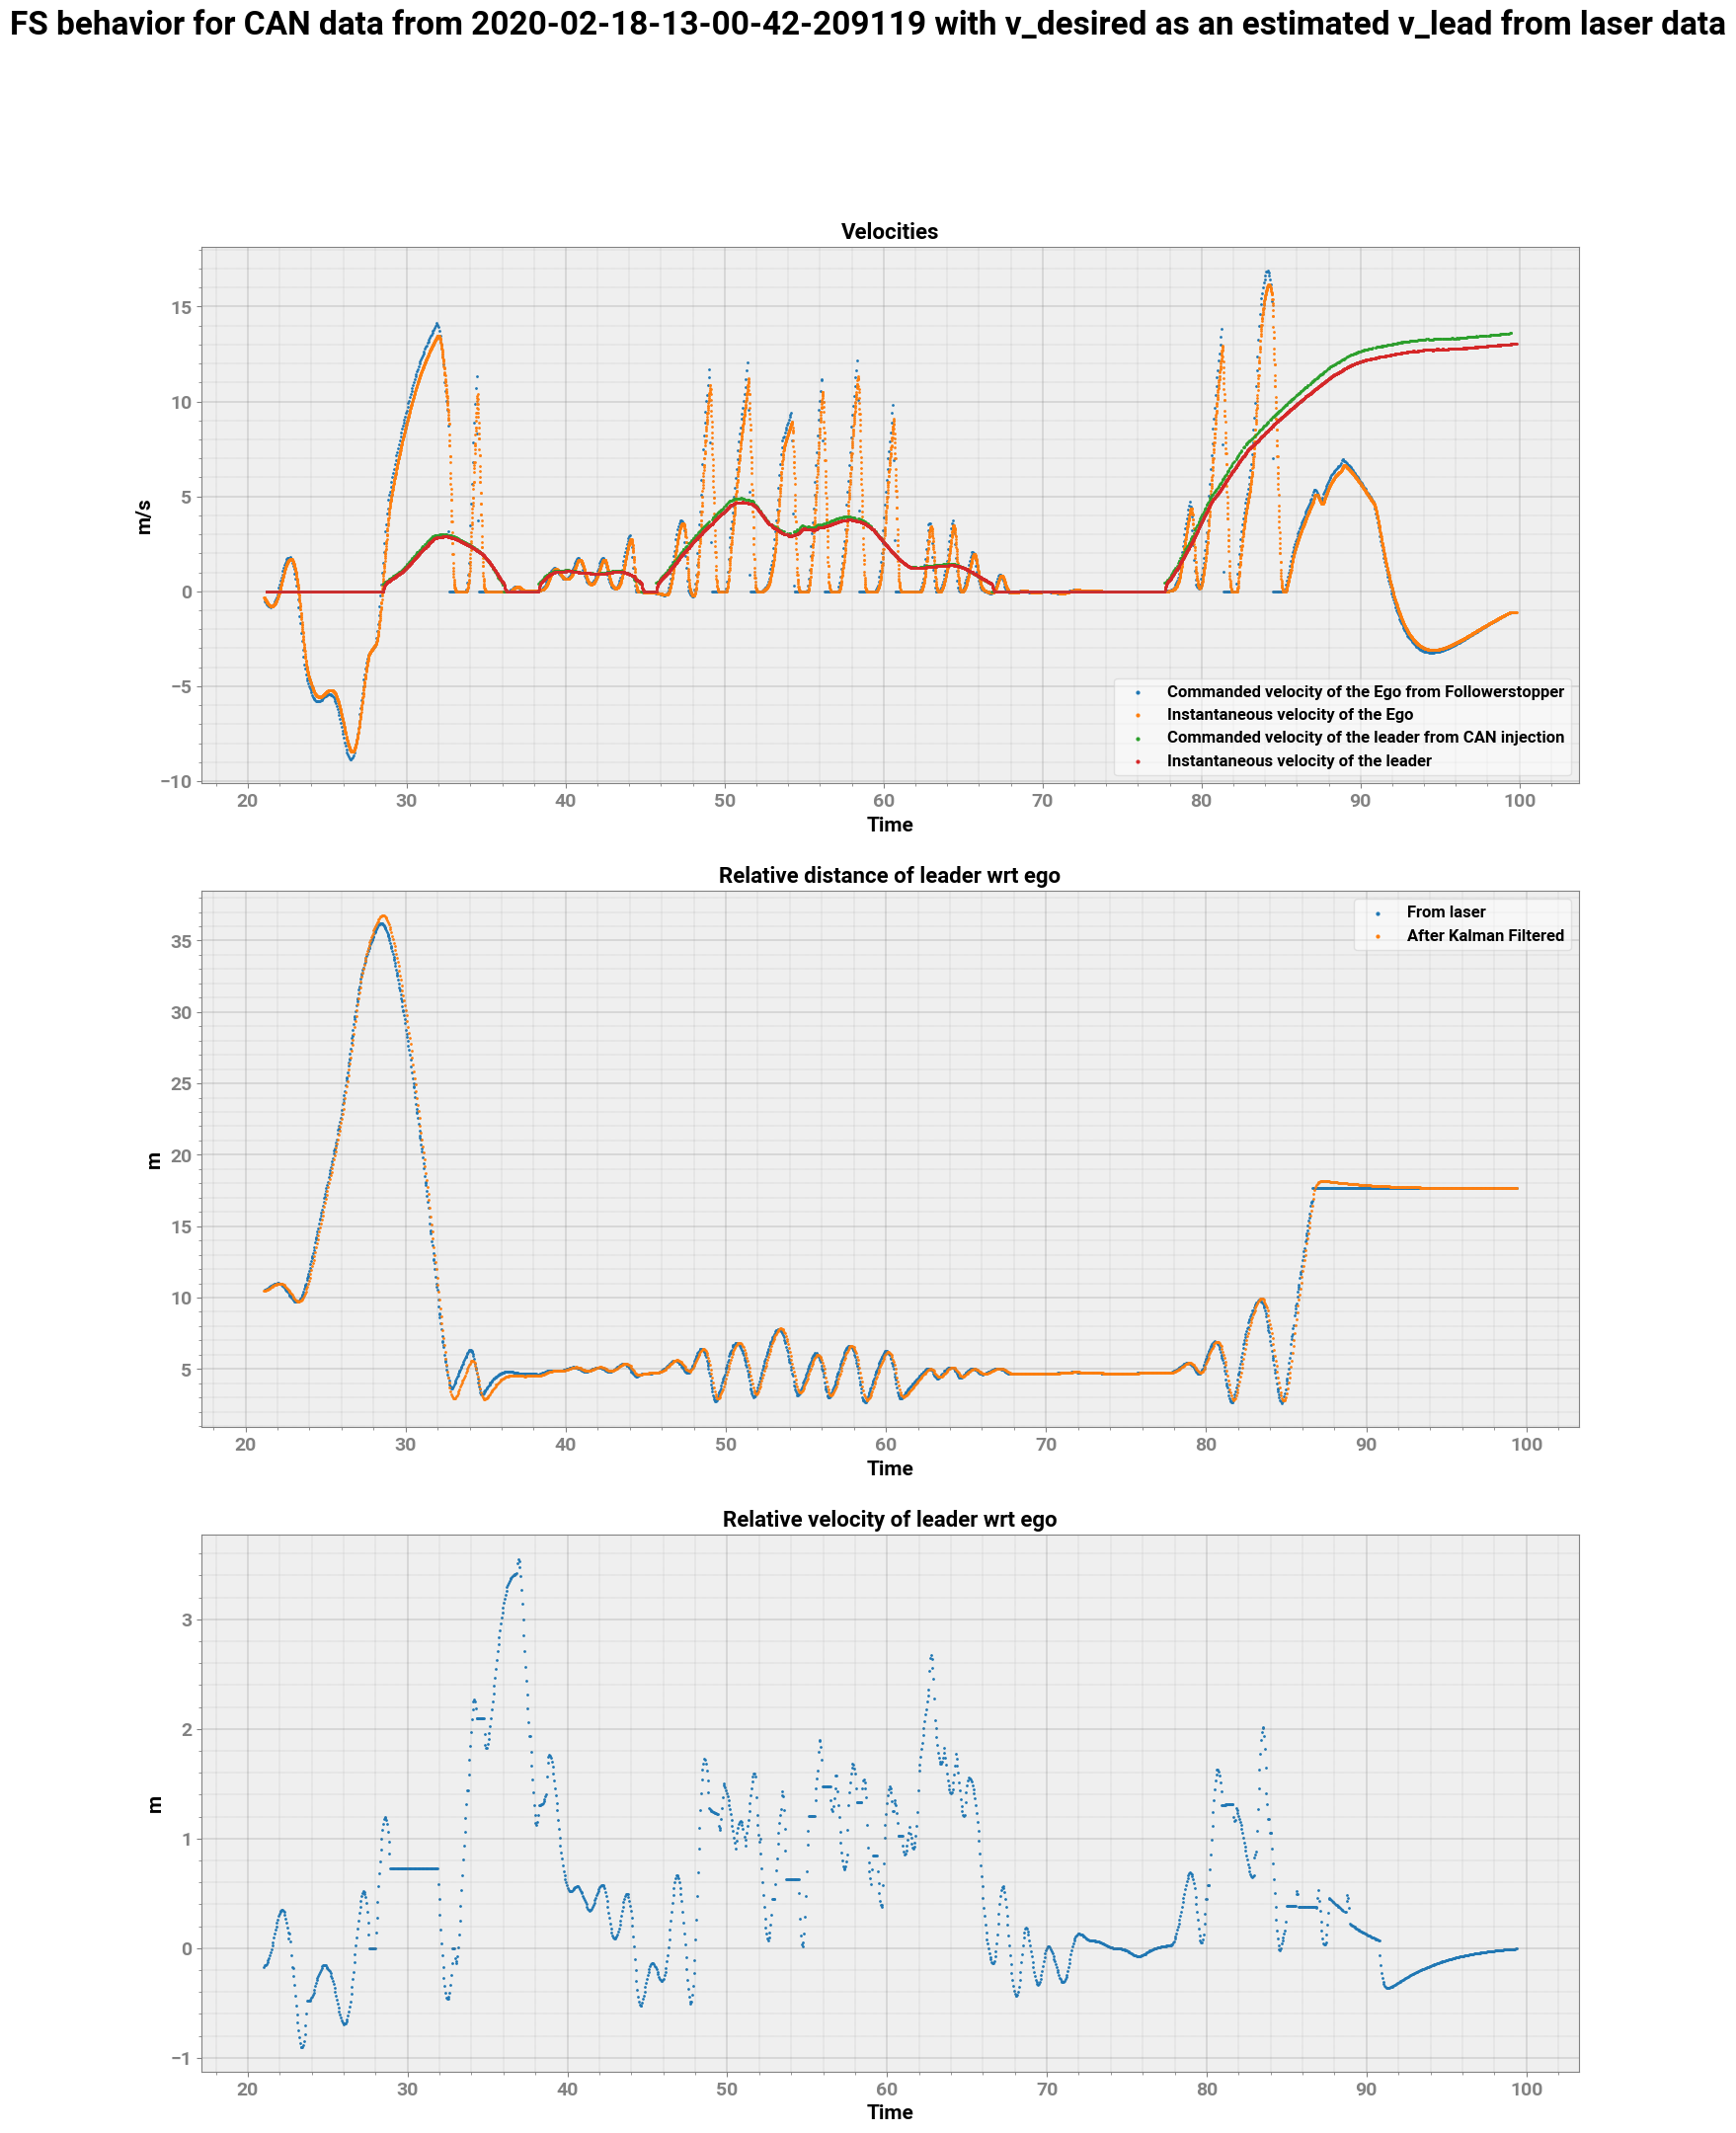

In [52]:
fig, ax = bagpy.create_fig(3)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = ego_cmd_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = ego_inst_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = leader_cmd_vel)
ax[0].scatter(x = "Time", y = "linear.x", s = 1, data = leader_inst_vel)
ax[0].legend(["Commanded velocity of the Ego from Followerstopper", "Instantaneous velocity of the Ego", 
             "Commanded velocity of the leader from CAN injection", "Instantaneous velocity of the leader"])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("m/s")
ax[0].set_title("Velocities")

ax[1].scatter(x = "Time", y = "data", s= 1, data = relative_dist)
ax[1].scatter(x = "Time", y = "data", s= 1, data = Kf_relative_dist)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("m")
ax[1].set_title("Relative distance of leader wrt ego")
ax[1].legend(["From laser", "After Kalman Filtered"])

ax[2].scatter(x = "Time", y = "data", s= 1, data = relative_vel)
ax[2].set_xlabel("Time")
ax[2].set_ylabel("m")
ax[2].set_title("Relative velocity of leader wrt ego")
fig.suptitle("FS behavior for CAN data from 2020-02-18-13-00-42-209119 with v_desired as an estimated v_lead from laser data")

plt.show()

